<a href="https://colab.research.google.com/github/arzss-code/jobsheet-machine-learning/blob/main/UTS_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Unsupervised Learning - Clustering Machine Learning

Atsiila Arya Nabiih - 4.33.23.1.04

## 1. Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from scipy.stats import zscore
import warnings

# Abaikan warning untuk visualisasi
warnings.filterwarnings('ignore', category=UserWarning)

# Atur gaya visualisasi
plt.style.use('classic')
sns.set(font_scale=1.2)
%matplotlib inline

## 2. Memuat Dataset

In [ ]:
# Muat dataset
file_path = "Dry_Bean.csv"
df = pd.read_csv(file_path)

# Tampilkan informasi dasar
print("Informasi Dataset:")
print(df.info())
print("\n5 Baris Pertama:")
print(df.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 

## 3. Analisis Data Eksploratif (EDA)

Nilai yang Hilang:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

Statistik Dataset:
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000  

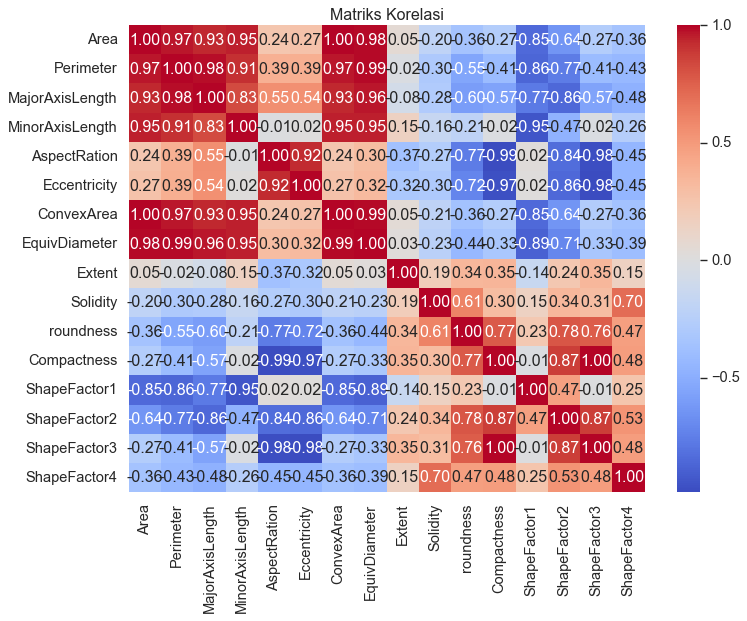

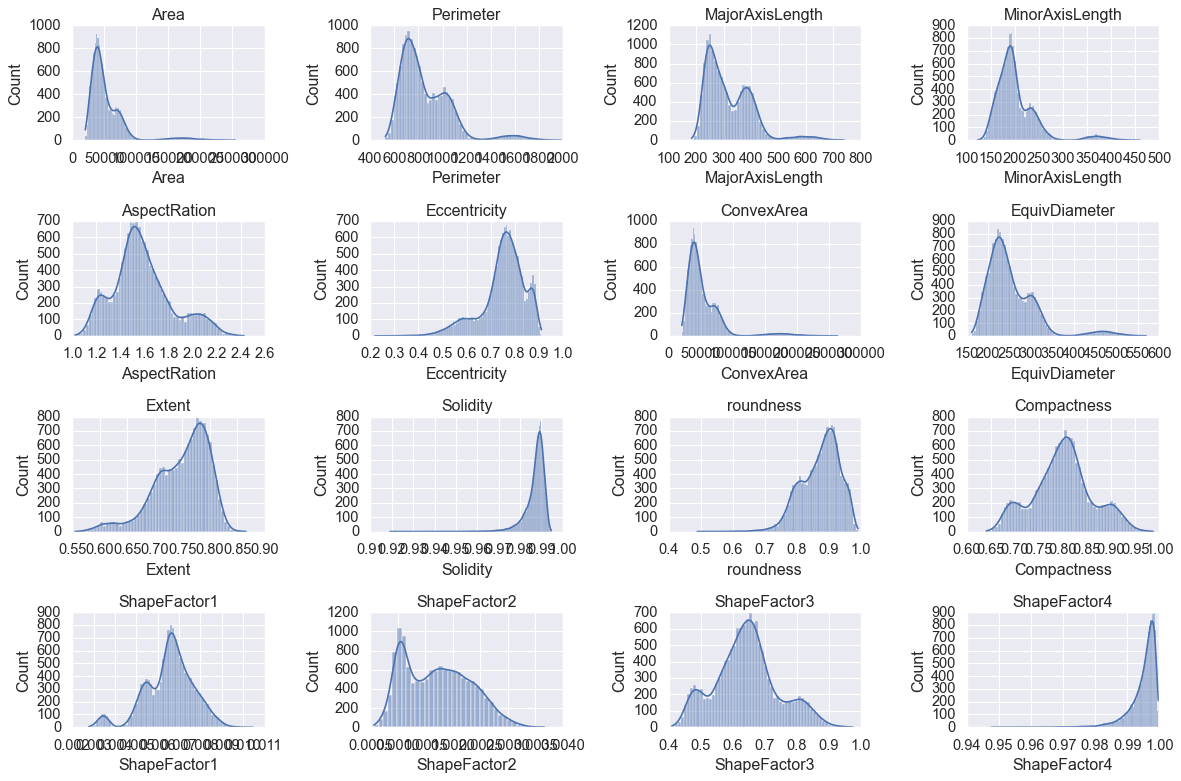

In [ ]:
# Periksa nilai yang hilang
print("Nilai yang Hilang:")
print(df.isnull().sum())

# Statistik dasar
print("\nStatistik Dataset:")
print(df.describe())

# Pilih kolom numerik
df_numeric = df.select_dtypes(include=[np.number])

# Matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.tight_layout()
plt.show()

# Distribusi fitur numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_numeric[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

## 4. Preprocessing dan Penghapusan Outlier

In [ ]:
# Hapus outlier menggunakan Z-score
df_numeric_cleaned = df_numeric[(np.abs(zscore(df_numeric)) < 3).all(axis=1)]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric_cleaned)

print(f"Ukuran dataset asli: {df_numeric.shape}")
print(f"Ukuran dataset setelah penghapusan outlier: {df_numeric_cleaned.shape}")

Ukuran dataset asli: (13611, 16)
Ukuran dataset setelah penghapusan outlier: (12487, 16)


## 5. Reduksi Dimensi dengan PCA

Rasio varians yang dijelaskan: [0.60538915 0.22786006]
Total varians yang dijelaskan: 0.8332492052055656


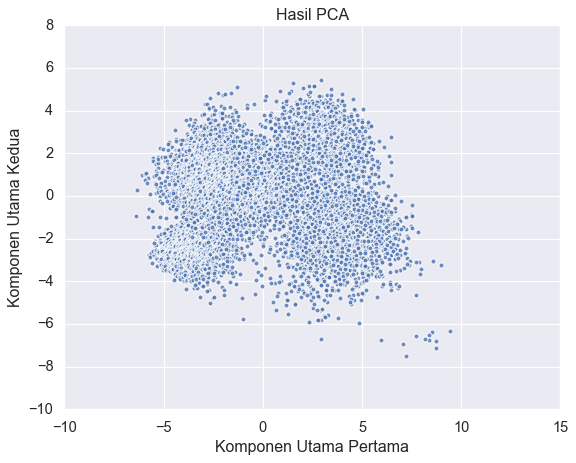

In [ ]:
# Terapkan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Rasio varians yang dijelaskan
print("Rasio varians yang dijelaskan:", pca.explained_variance_ratio_)
print("Total varians yang dijelaskan:", sum(pca.explained_variance_ratio_))

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.xlabel('Komponen Utama Pertama')
plt.ylabel('Komponen Utama Kedua')
plt.title('Hasil PCA')
plt.grid(True)
plt.show()

## 6. Menentukan Jumlah Cluster Optimal

### 6.1 K-Means: Metode Elbow

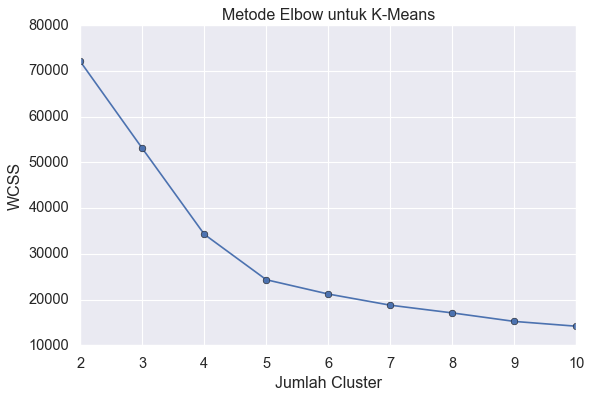

Jumlah cluster optimal untuk K-Means: 5


In [ ]:
# Metode Elbow untuk K-Means
wcss = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk K-Means')
plt.grid(True)
plt.show()

# Tentukan jumlah cluster optimal dengan metode Elbow
diff = np.diff(wcss)
diff_r = diff[1:] / diff[:-1]
optimal_k = range_clusters[np.argmin(diff_r) + 1]
print(f"Jumlah cluster optimal untuk K-Means: {optimal_k}")

### 6.2 DBSCAN: Mencoba Berbagai Nilai eps dan min_samples

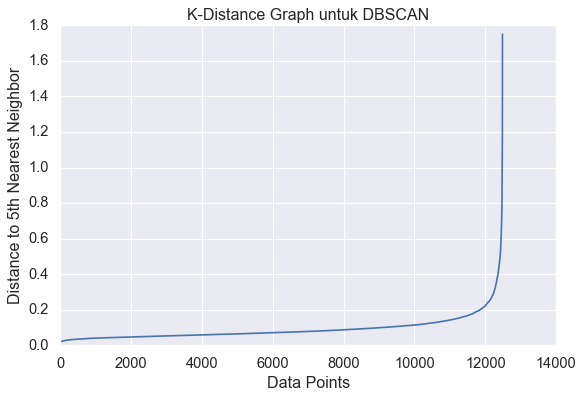

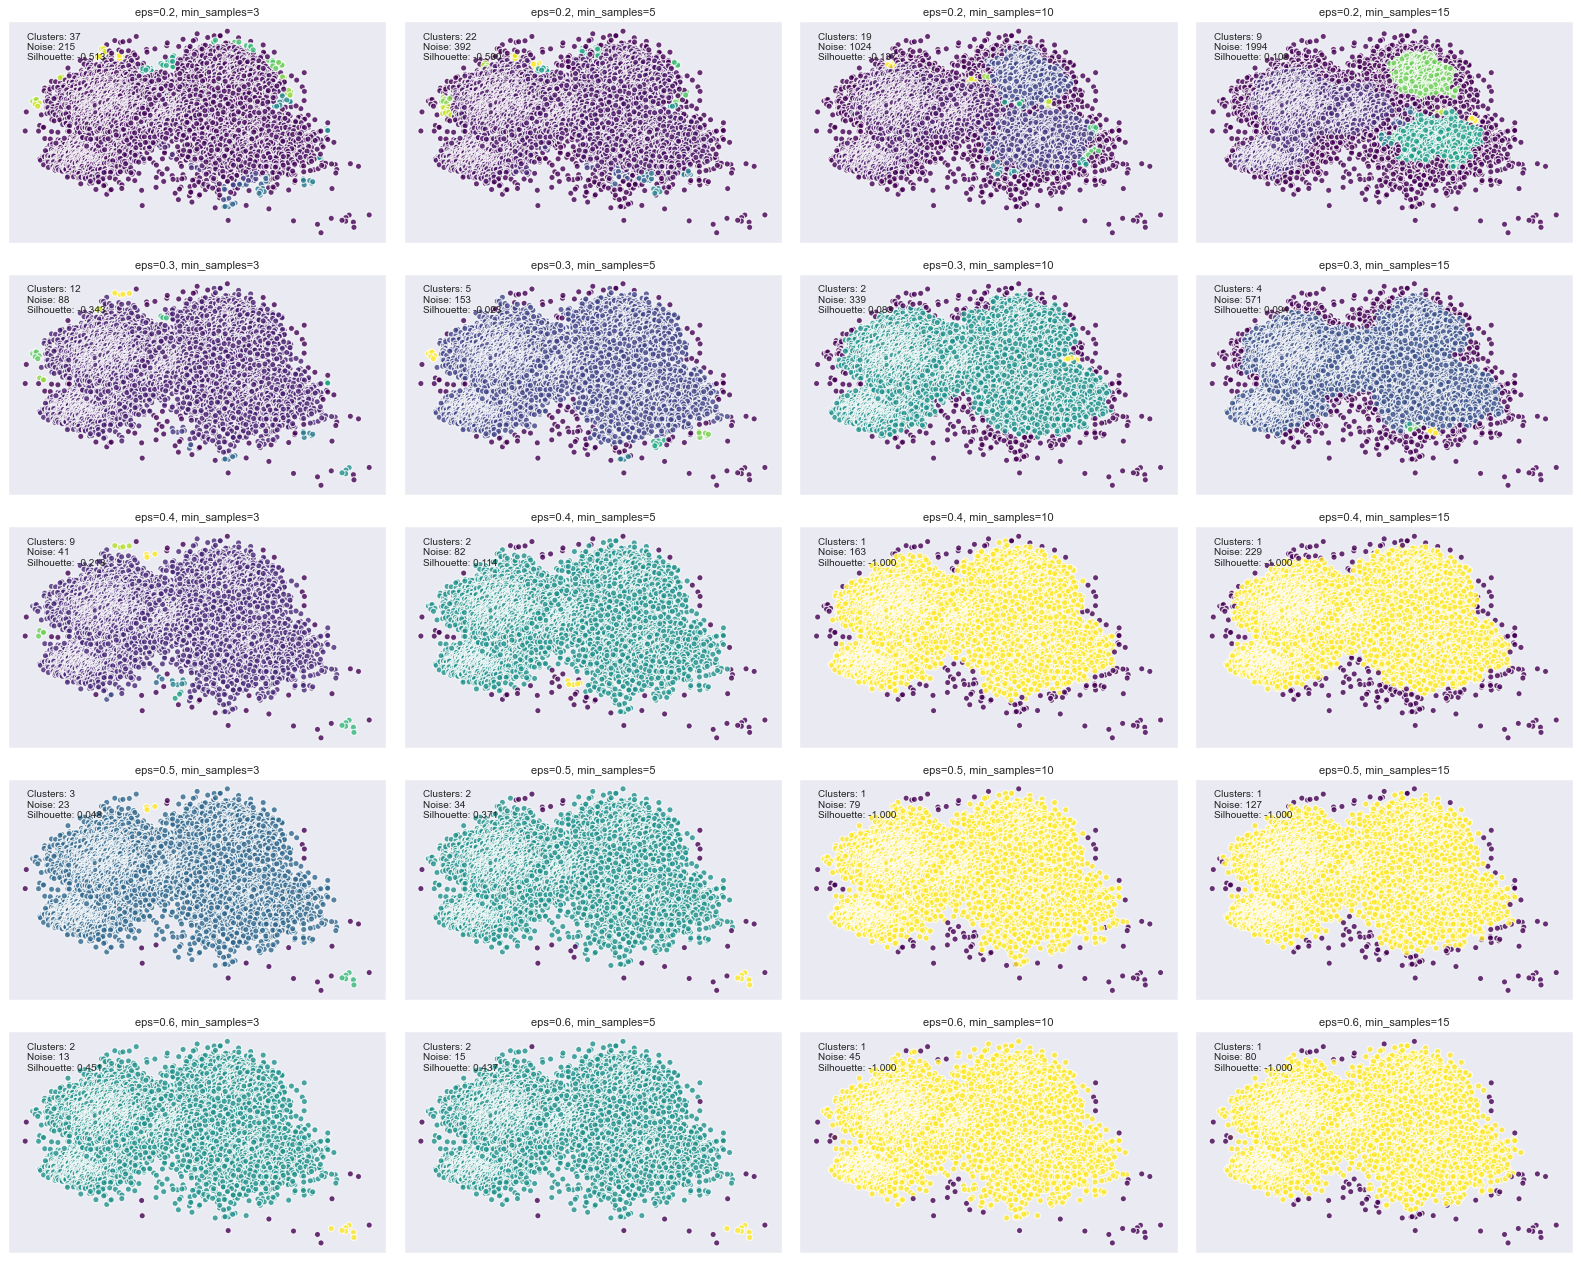

Parameter optimal untuk DBSCAN: eps=0.60, min_samples=3


In [ ]:
# K-Distance Graph untuk DBSCAN
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

distances = np.sort(distances[:, -1])

# Plot K-Distance Graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('K-Distance Graph untuk DBSCAN')
plt.grid(True)
plt.show()

# Percobaan berbagai nilai eps dan min_samples
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6]
min_samples_values = [3, 5, 10, 15]
results_dbscan = []

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 16))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)

        # Hitung jumlah cluster dan noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Hitung silhouette score jika memungkinkan
        silhouette_avg = silhouette_score(X_pca, labels) if n_clusters > 1 else -1

        # Simpan hasil
        results_dbscan.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette_score': silhouette_avg
        })

        # Visualisasi
        axes[i, j].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
        axes[i, j].set_title(f"eps={eps}, min_samples={min_samples}", fontsize=10)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].text(0.05, 0.95, f"Clusters: {n_clusters}\nNoise: {n_noise}\nSilhouette: {silhouette_avg:.3f}",
                        transform=axes[i, j].transAxes, fontsize=9, verticalalignment='top')

plt.tight_layout()
plt.show()

# Pilih parameter optimal berdasarkan jumlah cluster yang wajar dan silhouette score
results_dbscan_df = pd.DataFrame(results_dbscan)
filtered_results = results_dbscan_df[
    (results_dbscan_df['n_clusters'].between(2, 10)) &
    (results_dbscan_df['n_noise'] < len(X_pca) * 0.3)
]

if not filtered_results.empty:
    best_result = filtered_results.loc[filtered_results['silhouette_score'].idxmax()]
    optimal_eps = best_result['eps']
    optimal_min_samples = int(best_result['min_samples'])
else:
    optimal_eps = 0.5
    optimal_min_samples = 5

print(f"Parameter optimal untuk DBSCAN: eps={optimal_eps:.2f}, min_samples={optimal_min_samples}")

## 7. Analisis Clustering

### 7.1 K-Means Clustering

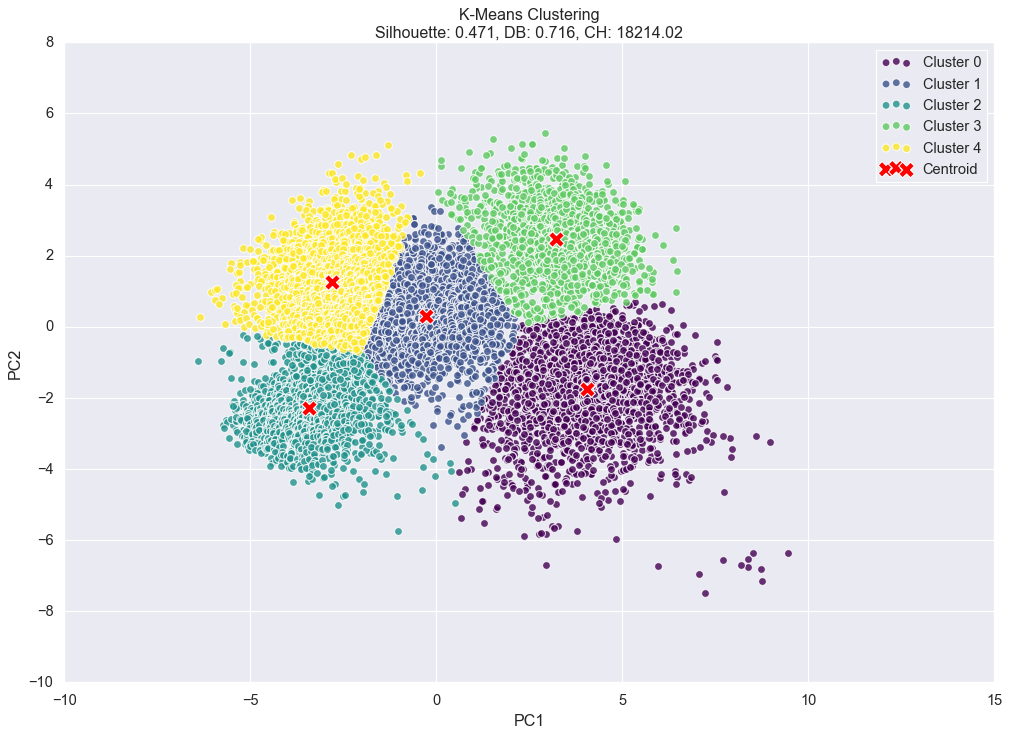

In [ ]:
# Inisialisasi K-Means dengan parameter optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Latih dan prediksi cluster
kmeans.fit(X_pca)
labels_kmeans = kmeans.predict(X_pca)
centroids_kmeans = kmeans.cluster_centers_

# Hitung metrik evaluasi
silhouette_kmeans = silhouette_score(X_pca, labels_kmeans) if len(set(labels_kmeans)) > 1 else 0
db_kmeans = davies_bouldin_score(X_pca, labels_kmeans) if len(set(labels_kmeans)) > 1 else float('inf')
ch_kmeans = calinski_harabasz_score(X_pca, labels_kmeans) if len(set(labels_kmeans)) > 1 else 0

# Visualisasi hasil K-Means
plt.figure(figsize=(15, 10))
unique_labels = np.unique(labels_kmeans)
for label in unique_labels:
    plt.scatter(X_pca[labels_kmeans == label, 0], X_pca[labels_kmeans == label, 1],
                c=plt.cm.viridis(label / max(unique_labels)), s=50, alpha=0.8, label=f'Cluster {label}')

plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, marker='X', label='Centroid')
plt.title(f'K-Means Clustering\nSilhouette: {silhouette_kmeans:.3f}, DB: {db_kmeans:.3f}, CH: {ch_kmeans:.2f}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

# Simpan metrik
results = {
    'Algorithm': ['K-Means'],
    'Silhouette Score': [silhouette_kmeans],
    'Davies-Bouldin Score': [db_kmeans],
    'Calinski-Harabasz Score': [ch_kmeans]
}

### 7.2 DBSCAN Clustering

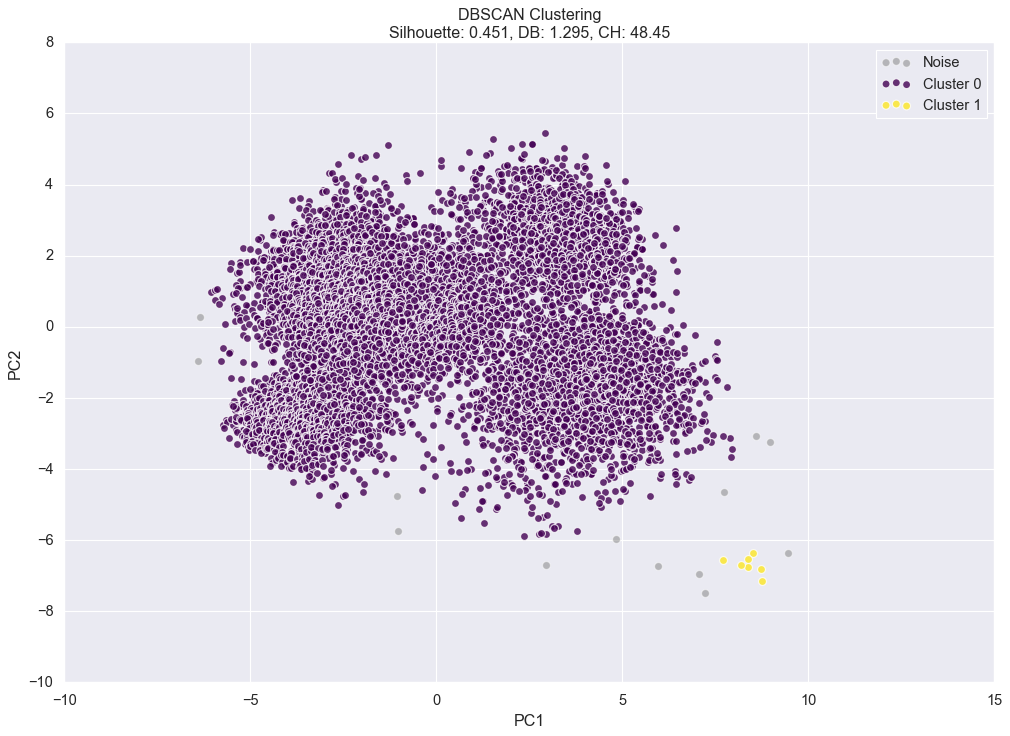

In [ ]:
# Inisialisasi DBSCAN dengan parameter optimal
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)

# Latih dan prediksi cluster
labels_dbscan = dbscan.fit_predict(X_pca)

# Hitung metrik evaluasi
silhouette_dbscan = silhouette_score(X_pca, labels_dbscan) if len(set(labels_dbscan)) > 1 else 0
db_dbscan = davies_bouldin_score(X_pca, labels_dbscan) if len(set(labels_dbscan)) > 1 else float('inf')
ch_dbscan = calinski_harabasz_score(X_pca, labels_dbscan) if len(set(labels_dbscan)) > 1 else 0

# Visualisasi hasil DBSCAN
plt.figure(figsize=(15, 10))
unique_labels = np.unique(labels_dbscan)
for label in unique_labels:
    if label == -1:  # Untuk noise
        plt.scatter(X_pca[labels_dbscan == label, 0], X_pca[labels_dbscan == label, 1],
                    c='gray', s=50, alpha=0.5, label='Noise')
    else:
        plt.scatter(X_pca[labels_dbscan == label, 0], X_pca[labels_dbscan == label, 1],
                    c=plt.cm.viridis(label / max(unique_labels)), s=50, alpha=0.8, label=f'Cluster {label}')

plt.title(f'DBSCAN Clustering\nSilhouette: {silhouette_dbscan:.3f}, DB: {db_dbscan:.3f}, CH: {ch_dbscan:.2f}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

# Tambahkan metrik DBSCAN ke results
results['Algorithm'].append('DBSCAN')
results['Silhouette Score'].append(silhouette_dbscan)
results['Davies-Bouldin Score'].append(db_dbscan)
results['Calinski-Harabasz Score'].append(ch_dbscan)

## 8. Perbandingan Model


Perbandingan Kinerja Model Clustering:
  Algorithm  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score
0   K-Means          0.470828              0.715770             18214.015941
1    DBSCAN          0.451454              1.294868                48.445308


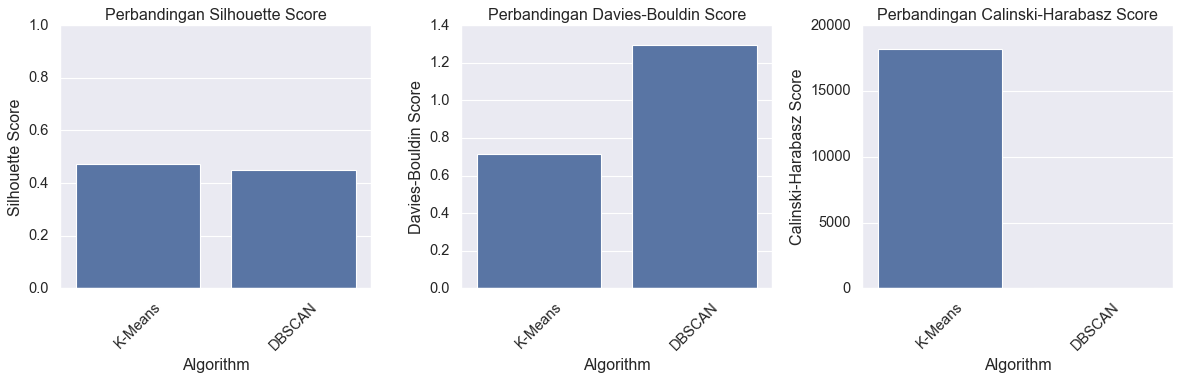


Penjelasan Metrik:
1. Silhouette Score: Nilai lebih tinggi (mendekati 1) menunjukkan cluster yang lebih baik terpisah.
2. Davies-Bouldin Score: Nilai lebih rendah menunjukkan cluster yang lebih baik (jarak antar cluster besar, ukuran cluster kecil).
3. Calinski-Harabasz Score: Nilai lebih tinggi menunjukkan cluster yang lebih padat dan terpisah.


In [ ]:
# Buat DataFrame untuk perbandingan
results_df = pd.DataFrame(results)

# Tampilkan tabel perbandingan
print("\nPerbandingan Kinerja Model Clustering:")
print(results_df)

# Visualisasi perbandingan metrik
plt.figure(figsize=(15, 5))

# Plot Silhouette Score
plt.subplot(1, 3, 1)
sns.barplot(x='Algorithm', y='Silhouette Score', data=results_df)
plt.title('Perbandingan Silhouette Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Plot Davies-Bouldin Score
plt.subplot(1, 3, 2)
sns.barplot(x='Algorithm', y='Davies-Bouldin Score', data=results_df)
plt.title('Perbandingan Davies-Bouldin Score')
plt.xticks(rotation=45)

# Plot Calinski-Harabasz Score
plt.subplot(1, 3, 3)
sns.barplot(x='Algorithm', y='Calinski-Harabasz Score', data=results_df)
plt.title('Perbandingan Calinski-Harabasz Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Analisis perbandingan
print("\nPenjelasan Metrik:")
print("1. Silhouette Score: Nilai lebih tinggi (mendekati 1) menunjukkan cluster yang lebih baik terpisah.")
print("2. Davies-Bouldin Score: Nilai lebih rendah menunjukkan cluster yang lebih baik (jarak antar cluster besar, ukuran cluster kecil).")
print("3. Calinski-Harabasz Score: Nilai lebih tinggi menunjukkan cluster yang lebih padat dan terpisah.")